In [1]:
import os
import cv2
import numpy as np
import time
from collections import Counter
import random
import matplotlib.pyplot as plt
from DataLoader import DataLoader
from knn_classifier import KNNClassifier


In [2]:
loader = DataLoader(image_size=(64, 64), grayscale=True)

In [3]:
X_train, y_train, X_test, y_test, class_names = loader.load_data('/home/an/an_workplace/Lab_CV/Data/PetImages/')

📂 Tìm thấy 2 lớp: ['Cat', 'Dog']
🔍 Đang xử lý lớp 'Cat'...
  - Tìm thấy 12499 ảnh


Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Cat/2663.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Cat/3491.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Cat/9171.jpg


Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Cat/140.jpg


Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Cat/11210.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Cat/7968.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Cat/11874.jpg


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Cat/850.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Cat/9778.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Cat/8470.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Cat/11935.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Cat/10501.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Cat/10125.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Cat/9565.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Cat/7978.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Cat/5553.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Cat/660.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Cat/10820.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Cat/4833.jpg


Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Cat/10404.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Cat/3300.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Cat/11565.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Cat/936.jpg
🔍 Đang xử lý lớp 'Dog'...
  - Tìm thấy 12499 ảnh


Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9


[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Dog/10797.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Dog/7459.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Dog/11849.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Dog/11675.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Dog/11410.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Dog/7369.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Dog/3136.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Dog/5604.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Dog/3288.jpg


Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Dog/8730.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Dog/2688.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Dog/1866.jpg


Corrupt JPEG data: 254 extraneous bytes before marker 0xd9


[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Dog/2877.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Dog/1308.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Dog/10747.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Dog/6059.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Dog/7969.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Dog/2384.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Dog/7133.jpg


Corrupt JPEG data: 399 extraneous bytes before marker 0xd9


[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Dog/5736.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Dog/4367.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Dog/3588.jpg


Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Dog/7112.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Dog/10401.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Dog/9188.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Dog/6718.jpg


Corrupt JPEG data: 226 extraneous bytes before marker 0xd9


[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Dog/11853.jpg
[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Dog/10158.jpg


[Lỗi đọc ảnh] /home/an/an_workplace/Lab_CV/Data/PetImages/Dog/6238.jpg
✅ Dữ liệu huấn luyện: (19956, 4096)
✅ Dữ liệu kiểm tra:   (4990, 4096)


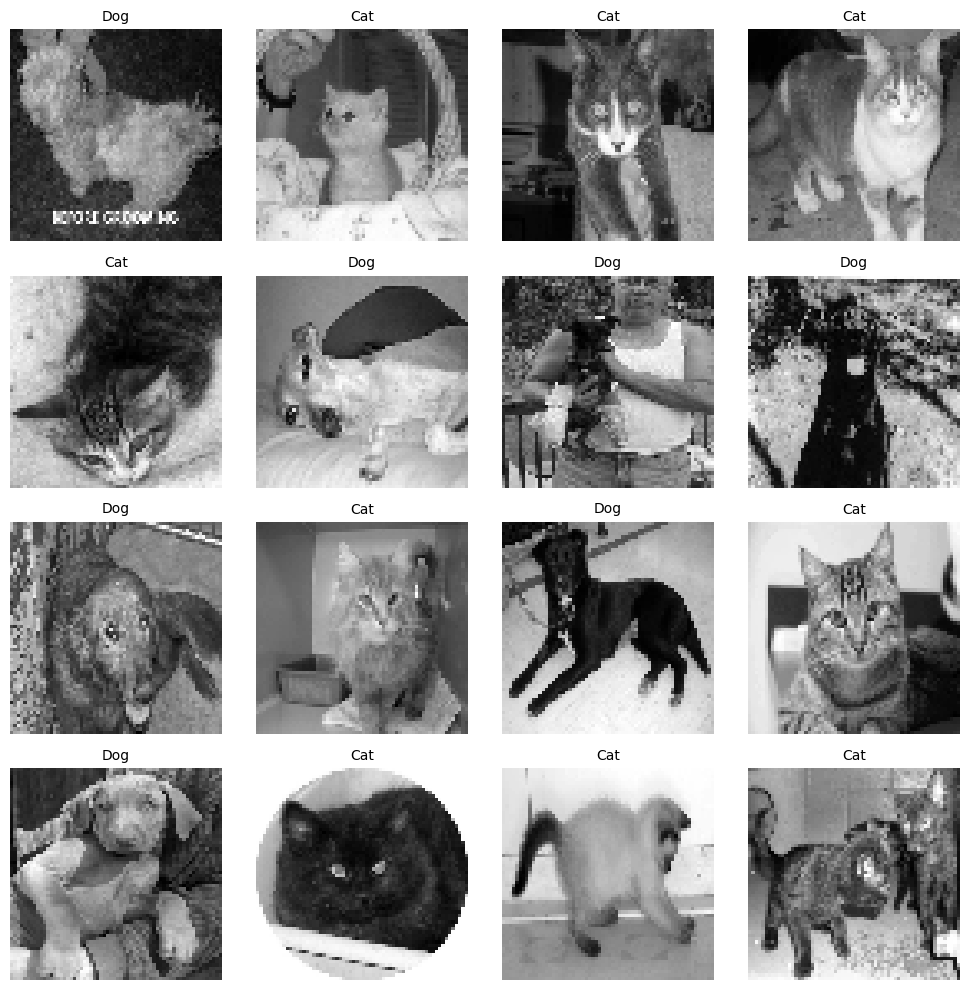

In [4]:
import matplotlib.pyplot as plt

def show_grid(X, y, class_names, n=16):
    plt.figure(figsize=(10, 10))
    for i in range(n):
        plt.subplot(4, 4, i+1)
        plt.imshow(X[i].reshape(64, 64), cmap='gray')
        plt.title(class_names[y[i]], fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_grid(X_train, y_train, class_names, n=16)


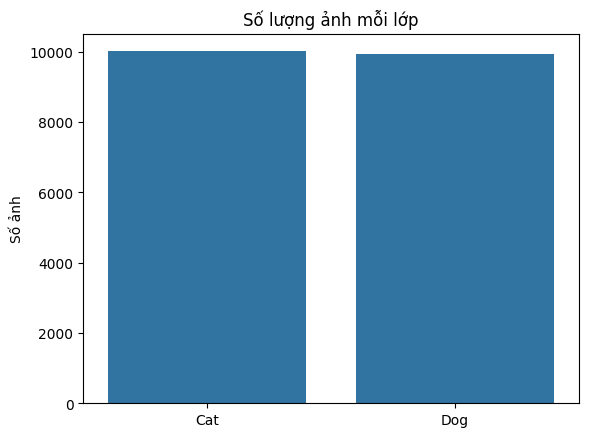

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_class_distribution(y, class_names):
    counts = [np.sum(y == i) for i in range(len(class_names))]
    sns.barplot(x=class_names, y=counts)
    plt.title("Số lượng ảnh mỗi lớp")
    plt.ylabel("Số ảnh")
    plt.show()

plot_class_distribution(y_train, class_names)


In [6]:
model = KNNClassifier(k=5, distance_metric='euclidean')
model.fit(X_train, y_train, class_names)

In [7]:
acc, cm = model.evaluate(X_test, y_test)


=== ĐÁNH GIÁ MÔ HÌNH ===
Số mẫu kiểm tra: 4990
Độ chính xác: 0.5557
Thời gian dự đoán: 982.51 giây


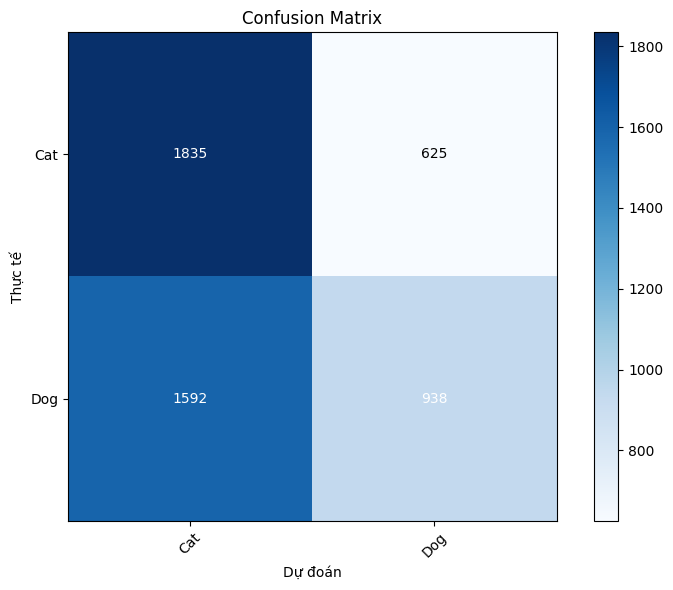

In [9]:
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Thực tế')
plt.xlabel('Dự đoán')
plt.tight_layout()
plt.show()

In [ ]:
print("\nDự đoán một so ảnh mau:")
sample_indices = np.random.choice(len(X_test), min(5, len(X_test)), replace=False)

for idx in sample_indices:
    true_label = class_names[y_test[idx]]
    predicted_label = class_names[model._predict_single(X_test[idx])]
    print(f"Ảnh {idx}: Nhãn thực tế: {true_label}, Dự đoán: {predicted_label}")



Dự đoán một số ảnh mẫu:
Ảnh 3822: Nhãn thực tế: Cat, Dự đoán: Cat
Ảnh 2936: Nhãn thực tế: Dog, Dự đoán: Dog
Ảnh 2504: Nhãn thực tế: Cat, Dự đoán: Cat
Ảnh 1073: Nhãn thực tế: Dog, Dự đoán: Cat
Ảnh 4955: Nhãn thực tế: Cat, Dự đoán: Dog


In [ ]:
k_values = [1, 3, 7, 9]
accuracies = []

print("\nThu nghiệm với các giá trị k khác nhau:")
for k in k_values:
    model.k = k
    acc_k, _ = model.evaluate(X_test, y_test)
    accuracies.append(acc_k)
    print(f"  - k = {k}: Độ chính xác = {acc_k:.4f}")

best_k = k_values[np.argmax(accuracies)]
best_acc = max(accuracies)
print(f"\n🏆 Giá trị k tốt nhất là {best_k} với độ chính xác = {best_acc:.4f}")



Thu nghiệm với các giá trị k khác nhau:

=== ĐÁNH GIÁ MÔ HÌNH ===
Số mẫu kiểm tra: 4990
Độ chính xác: 0.5449
Thời gian dự đoán: 993.11 giây
  - k = 1: Độ chính xác = 0.5449

=== ĐÁNH GIÁ MÔ HÌNH ===
Số mẫu kiểm tra: 4990
Độ chính xác: 0.5475
Thời gian dự đoán: 986.57 giây
  - k = 3: Độ chính xác = 0.5475


In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='--')
plt.title("Độ chính xác theo giá trị k")
plt.xlabel("Giá trị k")
plt.ylabel("Độ chính xác")
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()
